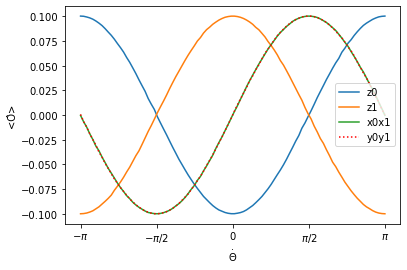

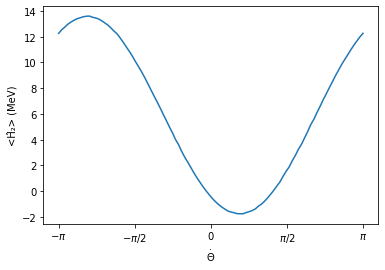

[-1.75892369 -1.75655263 -1.74416117 -1.75280862 -1.73457777 -1.76356554
 -1.7756143  -1.76388186 -1.7365293  -1.7586866 ]
<Ĥ₂> = -1.7545301472869874 ± 0.01219389849161047 MeV
<Ĥ₂> = -1.75 ± 0.01 MeV


In [11]:
import numpy as np
from qiskit import Aer
from qiskit import *
%matplotlib inline
import matplotlib.pyplot as plt
qiskit.__qiskit_version__

qr = QuantumRegister(2)       #2 quantum bit
cr = ClassicalRegister(2)     #2 classical bits

n = 100

def z0(circuit):
    z0_measure = circuit.copy()
    z0_measure.measure(0,0)
    return z0_measure
def z1(circuit):
    z1_measure = circuit.copy()
    z1_measure.measure(1,1)
    return z1_measure
def x0x1(circuit):
    x0x1_measure = circuit.copy()
    x0x1_measure.h(0)
    x0x1_measure.h(1)
    x0x1_measure.measure_all()
    return x0x1_measure
def y0y1(circuit):
    y0y1_measure = circuit.copy()
    y0y1_measure.rx(-np.pi/2,0)
    y0y1_measure.rx(-np.pi/2,1)
    y0y1_measure.measure_all()
    return y0y1_measure
    
def find_counts(circuit):
    counts1 = execute(circuit, sim, shots=shots).result().get_counts()
    counts = dict((k[:2], v) for k, v in counts1.items())
    probs = {}
    for output in ['00','01','10','11']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
    return probs


def H2_eq(Z0_array,Z1_array,X0X1_array,Y0Y1_array):
    return np.full(n,5.906709)+0.218291*Z0_array-6.125*Z1_array-2.143304*(X0X1_array+Y0Y1_array)

H2_array = np.zeros(10)

for f in range(0,10):
    Z0_array = np.zeros(n)
    Z1_array = np.zeros(n)
    X0X1_array = np.zeros(n)
    Y0Y1_array = np.zeros(n)

    angles = np.linspace(-np.pi, np.pi, n)
    for i in range(0,n):
        circ = QuantumCircuit(qr,cr)
        circ.x(0)
        circ.ry(angles[i],1)
        circ.cx(1,0)    

        shots = 2**16
        sim = Aer.get_backend('qasm_simulator')
        temp = []
        for j, measure_circuit in enumerate([z0(circ),z1(circ),x0x1(circ),y0y1(circ)]):

            if j==0:
                probs = find_counts(measure_circuit)
                temp.append(-probs['01']-probs['11']+probs['10']+probs['00'])
            elif j==1:
                probs = find_counts(measure_circuit)
                temp.append(-probs['11']-probs['10']+probs['01']+probs['00'])
            elif j==2 or j==3:
                probs = find_counts(measure_circuit)
                temp.append(probs['00']+probs['11']-probs['01']-probs['10'])
        Z0_array[i] = temp[0]
        Z1_array[i] = temp[1]
        X0X1_array[i] = temp[2]
        Y0Y1_array[i] = temp[3]
    H2_array[f]=min(H2_eq(Z0_array,Z1_array,X0X1_array,Y0Y1_array))

tick_pos= [-np.pi,-0.5*np.pi,0, 0.5*np.pi , np.pi]
labels = ['$-\pi$','$-\pi/2$','0', '$\pi/2$', '$\pi$']

plt.xlabel(r"$\dot{\Theta}$")
plt.ylabel('<O\u0302>')
plt.plot(angles,Z0_array/10.0,label="z0")
plt.plot(angles,Z1_array/10.0,label="z1")
plt.plot(angles,X0X1_array/10.0,label="x0x1")
plt.plot(angles,Y0Y1_array/10.0,color='red', linestyle='dotted',label="y0y1")
plt.xticks(tick_pos, labels)
plt.legend()
plt.show()

plt.xlabel(r"$\dot{\Theta}$")
plt.ylabel('<H\u0302\N{SUBSCRIPT TWO}> (MeV)')
plt.plot(angles,H2_eq(Z0_array,Z1_array,X0X1_array,Y0Y1_array))
plt.xticks(tick_pos, labels)
plt.show()

print(H2_array)
print("<H\u0302\N{SUBSCRIPT TWO}> =",np.mean(H2_array),u"\u00B1",np.std(H2_array),"MeV")
#print(np.std(H2_array))
print("<H\u0302\N{SUBSCRIPT TWO}> =",'%s' % float('%.3g' % np.mean(H2_array)),u"\u00B1",'%s' % float('%.1g' % np.std(H2_array)),"MeV")
#print(np.std(H2_array))

